In [ ]:
%pip install mglearn

In [ ]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# forge 데이터셋
# 인위적으로 만든 이진 분류 데이터셋
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")

print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

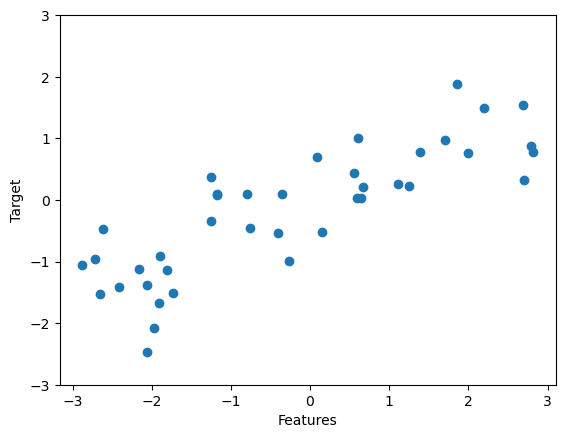

In [9]:
# wave 데이터셋
# 회귀 알고리즘에 사용

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Features")
plt.ylabel("Target")

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
# 569개의 데이터 포인트
# 30개의 특성

print("유방암 데이터의 형태", cancer.data.shape)

유방암 데이터의 형태 (569, 30)


In [14]:
# 569 개 데이터 포인터 중
# 212 개는 악성이고
# 357 개는 양성이다

print("클래스별 샘플 개수:\n", {
  n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))
})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [16]:
# feature_names 속성: 각 특성의 의미를 알 수 있다
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [19]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [21]:
# 보스턴 주택 가격 데이터셋
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print("데이터의 형태:", data.shape)

# Output
# 데이터의 형태: (506, 13)

데이터의 형태: (506, 13)


In [22]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

# Output
# X.shape: (506, 104)

X.shape: (506, 104)


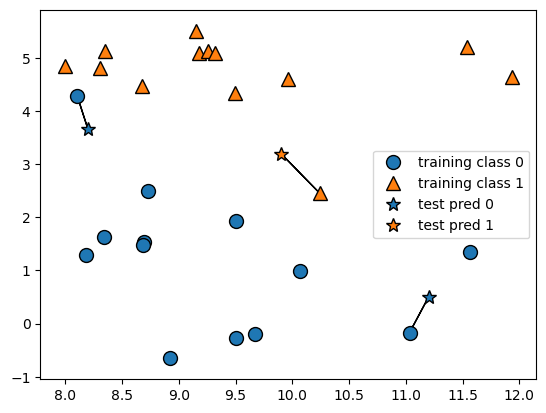

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

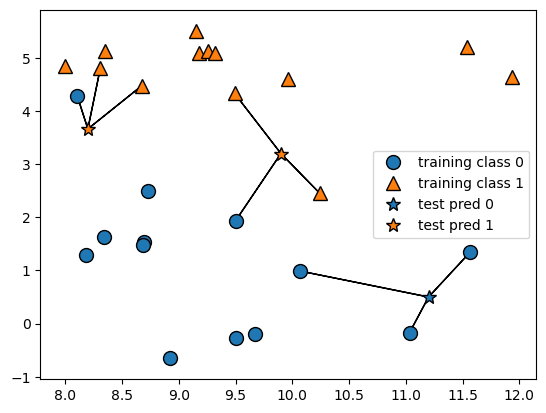

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [26]:
# 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# KNeighborsClassifier 클래스를 임포트하고 객체를 만든다
# 이웃의 수 같은 매개변수를 지정한다
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# 훈련 세트를 사용하여 분류 모델을 학습시킨다
# KNeighborsClassifier 학습: 예측할 때 이웃을 찾을 수 있도록 데이터를 저장
clf.fit(X_train, y_train)

# 테스트 데이터에 대해 predict 메서드를 호출하여 예측한다
# 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 다음 가장 많은 데이터를 찾는다
print("테스트 세트 예측:", clf.predict(X_test))
# Output
# 테스트 세트 예측: [1 0 1 0 1 0 0]

# 일반화 평가
# score 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출한다
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))
# Output
# 테스트 세트 정확도: 0.86
# 86% 정확도; 모델이 테스트 데이터셋에 있는 샘플 중 86%를 정확히 예측하였다


테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정확도: 0.86


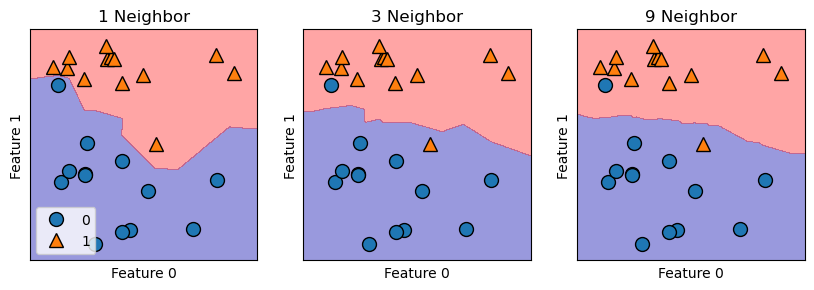

In [31]:
# Decision boundary
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit: sef 오브젝트를 리턴
  # 객체 생성과 fot 메서드를 한줄에 쓸 수 있다
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  # 결정 경계
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  # 분산도
  mglearn.discrete_scatter(X[:, 0],X[:,1], y,ax=ax)
  # 타이틀 & 레전드
  ax.set_title("{} Neighbor".format(n_neighbors))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

axes[0].legend(loc=3)

In [ ]:
# 유방암 데이터셋을 사용하여 모델의 복잡도와 일반화 사이의 관계를 입증

